In [2]:
import numpy as np
from pandas.io.parsers import read_csv

valores=read_csv("data3.csv",header=None).to_numpy()

In [3]:
X = valores[:, 0:2] #[fila[0:2] for fila in valores]
Y = valores[:,2]

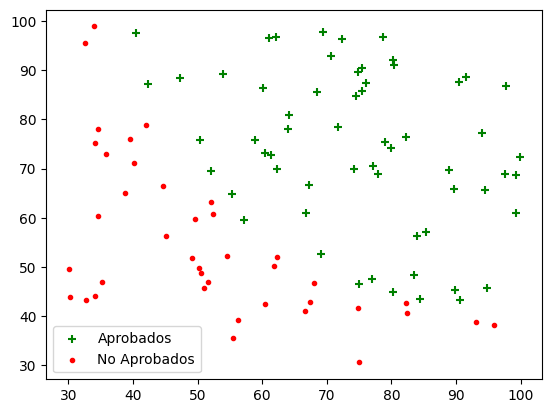

In [4]:
import matplotlib.pyplot as plt

pos = np.where(Y == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "Aprobados")

neg = np.where(Y == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "No Aprobados")

plt.legend()
plt.show()


In [5]:
def func_sigmoide(w,b,x):
    z = np.dot(x,w)+b
    return 1/(1+np.exp(-z))

In [190]:
def func_coste(X, Y, w, b):
    m = len(Y)
    f = func_sigmoide(w,b,X)
    coste = (-1/m) * (np.dot(Y, np.log(f)) + np.dot((1-Y), np.log(1-f)))
    return coste

def funcion_grad(X, Y, w, b):
    return np.dot(func_sigmoide(w, b, X) - Y,X), np.sum(func_sigmoide(w, b, X) - Y)

def descenso_gradiente(alpha, w, b, X, Y, iter):
    m = len(Y)
    for i in range(iter):
        f = func_sigmoide(w,b,X)
        w = w - alpha * (1/m) * np.dot(func_sigmoide(w, b, X) - Y,X)
        b = b - alpha * (1/m) * np.sum(func_sigmoide(w, b, X) - Y)
    return w, b

w= np.array([0.0,0.0])
b = 0
w, b = descenso_gradiente(0.01, w, b, X, Y, 1500) 
w,b
    

(array([0.56971072, 0.11147736]), -1.1533217354786154)

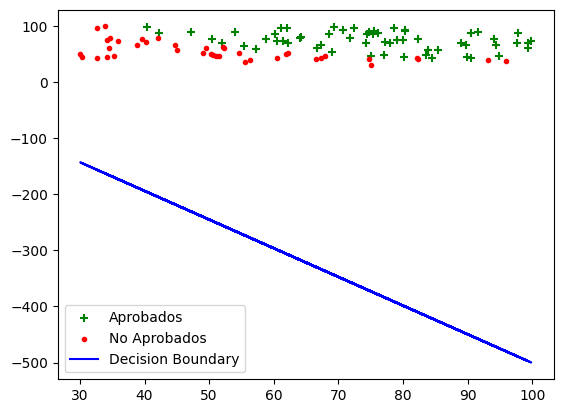

In [191]:
pos = np.where(Y == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "Aprobados")

neg = np.where(Y == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "No Aprobados")

def decision_boundary(X, w, b):
    return (-b - w[0]*X)/w[1]

#b = -100
#w = np.array([0.82,0.78])
X1 = X[:,0]
plt.plot(X1, decision_boundary(X1, w, b), c='b', label = "Decision Boundary")

plt.legend()
plt.show()